In [15]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plot 


# File to Load

spotify_data_load = Path("Resources/spotify_songs .csv")

# Read Data File and store into Pandas DataFrames
spotify_data= pd.read_csv(spotify_data_load)
spotify_data_drop = spotify_data.drop(columns =['track_id','track_album_id', 'playlist_id', 'track_album_name',
                                        'danceability', 'energy', 'mode', 'speechiness', 'acousticness',
                                        'instrumentalness', 'liveness', 'valence'])
# Show DateFrame
spotify_data_drop.head(20)

,track_name,track_artist,track_popularity,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,key,loudness,tempo,duration_ms
0,At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400
1,(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507
2,Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547
3,At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893
4,Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333
5,Green Onions,Booker T. & the M.G.'s,64,1962,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,10,-8.741,136.837,176333
6,Christmas (Baby Please Come Home),Darlene Love,73,1963,Christmas Soul,r&b,neo soul,3,-7.146,126.322,166453
7,Winter Wonderland,Aretha Franklin,45,1964,Christmas Soul,r&b,neo soul,7,-8.026,106.274,132107
8,Turn! Turn! Turn! (To Everything There Is a Se...,The Byrds,42,1965,Classic Rock,rock,classic rock,2,-8.170,124.594,229533
9,Que Bueno Baila Usted,Beny Moré,40,1965,Cuban vibes only,r&b,urban contemporary,5,-9.712,172.230,196933


In [3]:
#Check 
spotify_data_drop.dtypes

track_name                   object
track_artist                 object
track_popularity              int64
track_album_release_date      int64
playlist_name                object
playlist_genre               object
playlist_subgenre            object
key                           int64
loudness                    float64
tempo                       float64
duration_ms                   int64
dtype: object

In [4]:
#Make it pretty 
spotify_df = spotify_data_drop.rename(columns={"track_name": "Track Name", "track_artist": "Artist", "track_popularity": "Popularity",
                          "track_album_release_date": "Release Date", "playlist_name": "Playlist Name",
                          "playlist_genre": "Genre", "playlist_subgenre": "Subgenre", "key": "Key",
                          "loudness": "Loudness","tempo": "Tempo", "duration_ms": "Duration (ms)"})
spotify_df = spotify_df.set_index(["Track Name"])
spotify_df['Tempo'] =spotify_df['Tempo'].map('{:.3f}'.format)
spotify_df['Loudness'] =spotify_df['Loudness'].map('{:.3f}'.format)

#Print data frame
spotify_df

,Artist,Popularity,Release Date,Playlist Name,Genre,Subgenre,Key,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,
At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507
Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547
At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893
Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333
...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,1978,This Is Scorpions,rock,hard rock,3,-6.118,142.665,407333
Wavelength - Remastered,Van Morrison,44,1978,Classic Rock Retrogamer,rock,classic rock,0,-6.999,142.829,346987
Der Mussolini - 1998 - Remaster,DAF,2,1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,-9.404,156.308,235107


In [5]:
#Define the number assignments of the key in letter form. 
#Create new column for the letter key
def key_assign(key):
    if key == 0:
        return("C")
    elif key == 1:
        return('C#')
    elif key == 2:
        return('D')
    elif key == 3:
        return('D#')
    elif key == 4:
        return('E')
    elif key == 5:
        return("F")
    elif key == 6:
        return('F#')
    elif key == 7:
        return('G')
    elif key == 8:
        return('G#')
    elif key == 9:
        return('A')
    elif key == 10:
        return('A#')
    elif key == 11:
        return('B')
    else:
        return('No Key Detected')

spotify_df["Key Assignment"] = spotify_df['Key'].apply(key_assign)

#Display new data frame
spotify_df

,Artist,Popularity,Release Date,Playlist Name,Genre,Subgenre,Key,Loudness,Tempo,Duration (ms),Key Assignment
Track Name,,,,,,,,,,,
At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400,F
(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507,B
Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547,G
At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893,F
Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333,A#
...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,1978,This Is Scorpions,rock,hard rock,3,-6.118,142.665,407333,D#
Wavelength - Remastered,Van Morrison,44,1978,Classic Rock Retrogamer,rock,classic rock,0,-6.999,142.829,346987,C
Der Mussolini - 1998 - Remaster,DAF,2,1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,-9.404,156.308,235107,F#


In [6]:
#Categorize and Establish Bins for Popularity
size_bins = (0, 30, 60, 90, 100)
labels = ['Least Popular (<30)', 'Low to Mid Popular (30-59)',
          'Mid to High Popular (60-89)','Most Popular (90-100)'] 

spotify_df["Popularity Sectors"] = pd.cut(spotify_df["Popularity"],size_bins, labels=labels)

#Organize Columns
spotify_df =spotify_df.reindex(columns=['Artist', 'Popularity', 'Popularity Sectors', 'Release Date',
                                       'Playlist Name', 'Genre', 'Subgenre', 'Key', 'Key Assignment',
                                       'Loudness', 'Tempo', 'Duration (ms)'])
#Print data frame
spotify_df

,Artist,Popularity,Popularity Sectors,Release Date,Playlist Name,Genre,Subgenre,Key,Key Assignment,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,,,
At Last - Single Version,Etta James,25,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,F,-9.981,174.794,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,B,-9.889,128.091,125507
Jingle Bells,Ella Fitzgerald,11,Least Popular (<30),1960,Christmas Soul,r&b,neo soul,7,G,-6.295,119.117,142547
At Last - Single Version,Etta James,15,Least Popular (<30),1960,Sexy Soul 2020,r&b,neo soul,5,F,-9.881,174.610,179893
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (60-89),1962,Supernatural Classic Rock,rock,classic rock,10,A#,-8.741,136.837,176333
...,...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,Least Popular (<30),1978,This Is Scorpions,rock,hard rock,3,D#,-6.118,142.665,407333
Wavelength - Remastered,Van Morrison,44,Low to Mid Popular (30-59),1978,Classic Rock Retrogamer,rock,classic rock,0,C,-6.999,142.829,346987
Der Mussolini - 1998 - Remaster,DAF,2,Least Popular (<30),1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,F#,-9.404,156.308,235107


In [7]:
#------------------------------------------------------------------------#
#-------------------------------DURATION---------------------------------#
#------------------------------------------------------------------------#
# Copy dataframe for duration analysis 
spotify_duration_df = spotify_df.copy()

# Let's convert Duration(ms) to Duration(minutes)
spotify_duration_df['Duration (min)'] = round(spotify_duration_df['Duration (ms)'] / 60000,3)
spotify_duration_df

,Artist,Popularity,Popularity Sectors,Release Date,Playlist Name,Genre,Subgenre,Key,Key Assignment,Loudness,Tempo,Duration (ms),Duration (min)
Track Name,,,,,,,,,,,,,
At Last - Single Version,Etta James,25,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,F,-9.981,174.794,182400,3.040
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,B,-9.889,128.091,125507,2.092
Jingle Bells,Ella Fitzgerald,11,Least Popular (<30),1960,Christmas Soul,r&b,neo soul,7,G,-6.295,119.117,142547,2.376
At Last - Single Version,Etta James,15,Least Popular (<30),1960,Sexy Soul 2020,r&b,neo soul,5,F,-9.881,174.610,179893,2.998
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (60-89),1962,Supernatural Classic Rock,rock,classic rock,10,A#,-8.741,136.837,176333,2.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,Least Popular (<30),1978,This Is Scorpions,rock,hard rock,3,D#,-6.118,142.665,407333,6.789
Wavelength - Remastered,Van Morrison,44,Low to Mid Popular (30-59),1978,Classic Rock Retrogamer,rock,classic rock,0,C,-6.999,142.829,346987,5.783
Der Mussolini - 1998 - Remaster,DAF,2,Least Popular (<30),1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,F#,-9.404,156.308,235107,3.918


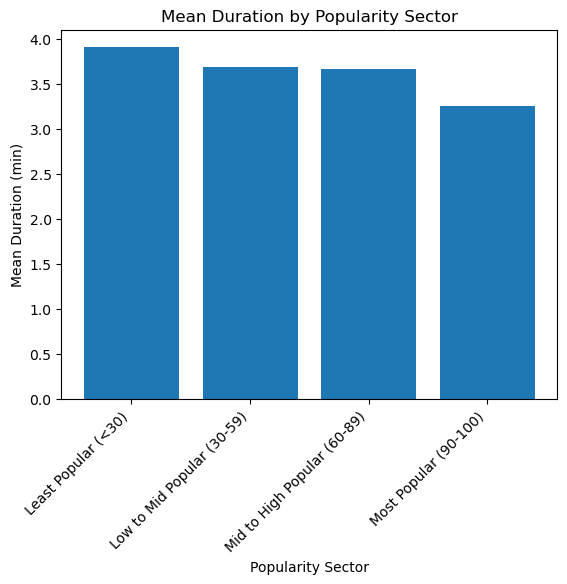

In [9]:
#------------------------------------------------------------------------#
#-------------------------------BAR CHART--------------------------------#
#------------------------------------------------------------------------#

#Group by popularity sector and calculate the mean duration for each sector
duration_by_popularity = spotify_duration_df.groupby('Popularity Sectors')['Duration (min)'].mean()

# Plot -> Mean Duration by Popularity Sector
plt.bar(duration_by_popularity.index, duration_by_popularity)
plt.title('Mean Duration by Popularity Sector')
plt.xlabel('Popularity Sector')
plt.ylabel('Mean Duration (min)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

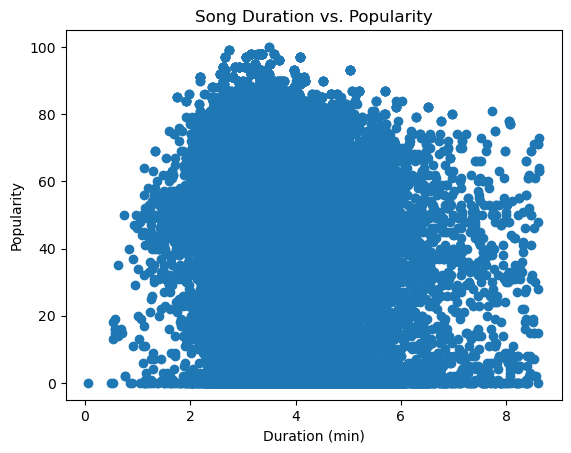

In [10]:
#------------------------------------------------------------------------#
#-----------------------------SCATTER PLOT-------------------------------#
#------------------------------------------------------------------------#

# Select relevant columns for the scatter plot
df_subset_duration = spotify_duration_df[['Popularity', 'Duration (min)','Popularity Sectors']]

# Plot a scatter plot
plt.scatter(df_subset_duration['Duration (min)'], df_subset_duration['Popularity'])
plt.title('Song Duration vs. Popularity')
plt.xlabel('Duration (min)')
plt.ylabel('Popularity')
plt.show()

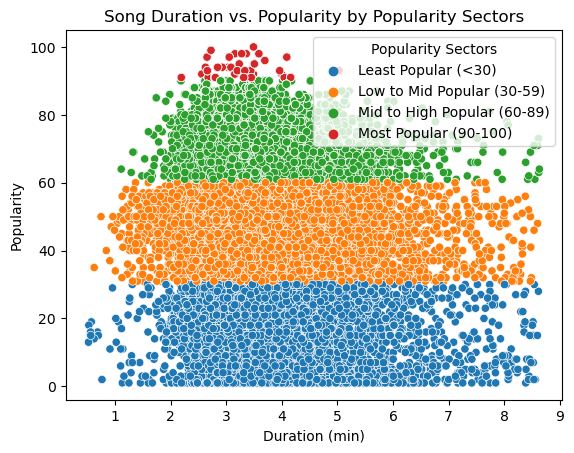

In [12]:
#---------------------Additional SCATTER PLOT-------------------------------#
import seaborn as sns
# Scatter plot with different colors for each popularity sector
sns.scatterplot(x='Duration (min)', y='Popularity', hue='Popularity Sectors', data=df_subset_duration)
plt.title('Song Duration vs. Popularity by Popularity Sectors')
plt.xlabel('Duration (min)')
plt.ylabel('Popularity')
plt.show()


The r-value is : -0.14368094806706228


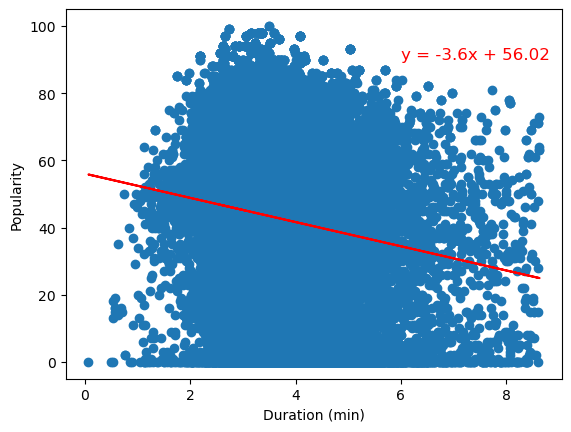

In [18]:
#------------------------------------------------------------------------#
#------------------------LINEAR REGRESSION PLOT--------------------------#
#------------------------------------------------------------------------#


def f_linear_reg_plot(x_value,y_value,x_label,y_label,x_s,y_s):

# Linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Line to plot   
#     plt.figure(figsize=(10,6))
    plt.scatter(x_value, y_value)
    plt.plot(x_value,regress_values,"r-") # regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(x_s,y_s),fontsize=12,color="red") #regression line label
    
    # correlation
    print(f"The r-value is : {st.pearsonr(x_value, y_value)[0]}") 
    plt.show() # Show the plot
    
    
    
#Let's call the function above
#--------Popularity vs. Duration (min) Linear Regression Plot---------#
x_value = df_subset_duration['Duration (min)']
y_value = df_subset_duration['Popularity']
f_linear_reg_plot(x_value, y_value, "Duration (min)", "Popularity",6,90)

The r-value is : -0.14368094806706228


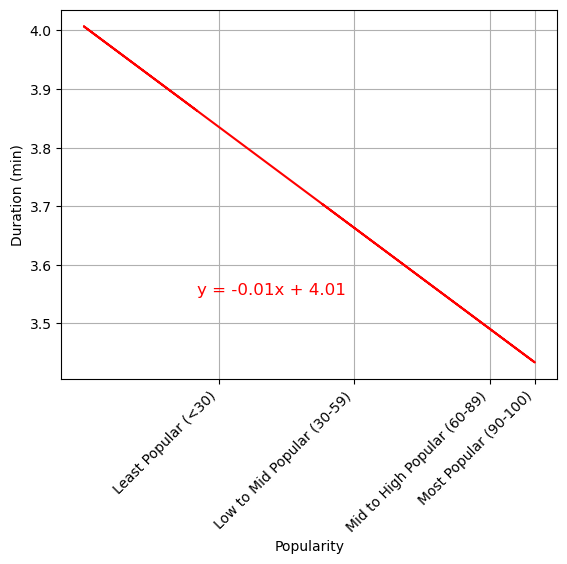

In [25]:
def f_linear_reg_plot2(x_value,y_value,x_label,y_label,x_s,y_s):

# Linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Line to plot   
    plt.plot(x_value,regress_values,"r-") # regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(x_s,y_s),fontsize=12,color="red") #regression line label
    plt.xticks([30, 60, 90, 100],labels, rotation=45, ha='right') #Set x ticks to labels 
    plt.grid(True)

# correlation
    print(f"The r-value is : {st.pearsonr(x_value, y_value)[0]}") 
    #     r = st.pearsonr(x_value, y_value)
    #     print(f"The r-value is: {r[0]}")
    plt.show() # Show the plot

 
# Let's call the function above
#--------Popularity vs. Duration (min) Linear Regression Plot---------#    
y_value = df_subset_duration['Duration (min)']
x_value = df_subset_duration['Popularity']
f_linear_reg_plot2(x_value, y_value, "Popularity","Duration (min)",25,3.55)